<font color="#a9a56c" size=2> **@Author: Arif Kasim Rozani - (Team Operation Badar)** </font>


## **Class Variable vs Instance Variable**

## **Key Differences**


| Feature      | Class Variable                                            | Instance Variable                          |   |
|--------------|-----------------------------------------------------------|--------------------------------------------|---|
| Scope        | Shared by all instances of the class                      | Unique to each instance of the class       |   |
| Creation     | Created when the class is defined                         | Created when an object is instantiated     |   |
| Access       | Accessed using the class name or instance name            | Accessed through an instance of the class  |   |
| Modification | Modified using the class name                             | Modified through a specific instance       |   |
| Use Cases    | Maintain values common to all instances, track statistics | Store object-specific data                 

Understanding the distinction between class and instance variables is crucial for effective object-oriented programming in Python. Class variables provide a way to share data and behavior across all instances of a class, while instance variables allow each object to have its own unique state.

# **Composition and Aggregation**

Composition and Aggregation are not design patterns — they are object-oriented design principles — how objects are built or connected.

### ✅ Composition (Strong Relationship — "part of")

-   Think of a **car and its engine**.
    
-   A car **has-an** engine.
    
-   If the **car is destroyed**, the **engine is gone too**.
    
-   The engine **can’t exist on its own** — it’s part of the car.
    
-   In Python, this means one class creates and **owns** objects of another class.

In [ ]:
class Engine:
    def start(self):
        print("Engine starts")

class Car:
    def __init__(self):
        self.engine = Engine()  # Car owns the Engine

    def drive(self):
        self.engine.start()

my_car = Car()
my_car.drive()


Engine starts


<font color=orange>If my_car is deleted, the engine is also gone — they are tightly connected.</font>


### ✅ Aggregation (Weak Relationship — "connected to")

-   Think of a **school and its students**.
    
-   A school **has students**, but students can **exist without** the school.
    
-   If the school closes, the students still **exist elsewhere**.
    
-   In Python, this means one class is **linked** to another, but doesn’t own it.

In [ ]:
class Student:
    def __init__(self, name):
        self.name = name

class School:
    def __init__(self, students):
        self.students = students  # School does not own students

student1 = Student("Ali")
student2 = Student("Sara")
my_school = School([student1, student2])

print("School = ", my_school)

School =  <__main__.School object at 0x7c7b306b23d0>


In [ ]:
del my_school

In [ ]:
print("Student1 = ", student1)
print("Student2 = ", student2)

Student1 =  <__main__.Student object at 0x7c7b306b25d0>
Student2 =  <__main__.Student object at 0x7c7b306b2510>


<font color=orange>Here, even if my_school is deleted, student1 and student2 still exist — they’re independent.</font>

# **Method Resolution Order (MRO) and Diamond Inheritance**

**Method Resolution Order (MRO)** is the order in which Python searches for methods and attributes in a class hierarchy, especially in cases of multiple inheritance. It ensures that the correct method or attribute is found and called `when there are overlapping names in the inheritance tree`.

## **Example: Understanding MRO in Python**

Let’s create a class hierarchy with multiple inheritance to demonstrate how MRO works.

In [ ]:
# Define the classes
class A:
    def greet(self):
        return "Hello from A"

class B(A):
    def greet(self):
        return "Hello from B"

class C(A):
    def greet(self):
        return "Hello from C"

class D(B, C): # Diamond Inheritance
    pass

# Create an instance of D
d = D()

# Check the MRO of class D
print(D.mro())  # Output: [<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]

# Call the greet method
print(d.greet())  # Output: Hello from B
print("The MRO for class D can be visualized as a linear sequence: D → B → C → A → object")

[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]
Hello from B
The MRO for class D can be visualized as a linear sequence: D → B → C → A → object



### 🎯 KEY POINT:

> **“When there are overlapping names in the inheritance tree”** means **more than one parent class** defines the **same method or attribute name**.  
> Python then uses **MRO** to figure out **which one to call** — avoiding confusion and errors.

[The Veiled Virgin](https://en.wikipedia.org/wiki/The_Veiled_Virgin)

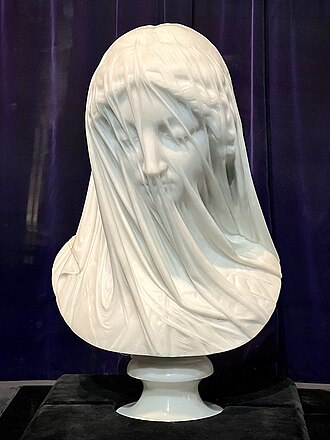

<font color=orange>The Veiled(vayld) Virgin looks like it’s wearing a soft veil, but it’s all carved from one solid rock—just like a decorator adds something extra to a function without changing it. The function stays the same underneath, but the decorator adds a special effect. It’s like dressing up your code without touching its heart.</font>








# **Decorators in Classes**

Decorators in Python are a powerful feature that allows you to modify or extend the behavior of functions or methods. When applied to classes, decorators can enhance or alter the behavior of the class or its methods. Additionally, Python provides specific property decorators (@property, @setter, and @deleter) to manage attribute access in a controlled way.

## **Function Decorators**

In [ ]:
def star_decorator(func):   # say_hello() will passed as a parameter
    def wrapper():
        print("★" * 5)
        func()
        print("★" * 5)
    return wrapper

@star_decorator
def say_hello():
    print("Hello!")

say_hello()

★★★★★
Hello!
★★★★★


## **Class Decorators**

In [ ]:
class ObjectCounter:
    def __init__(self, cls):
        print("Decorator Applied: ", cls)
        self.cls = cls
        self.count = 0

    def __call__(self, *args, **kwargs):
        self.count += 1
        print(f"{self.cls.__name__} object created {self.count} times")
        return self.cls(*args, **kwargs)

In [ ]:
@ObjectCounter
class Animal:
  pass

Decorator Applied:  <class '__main__.Animal'>


In [ ]:
# Create instances
a = Animal()
b = Animal()
c = Animal()

Animal object created 1 times
Animal object created 2 times
Animal object created 3 times


In [ ]:
@ObjectCounter
class Car:
  pass

Decorator Applied:  <class '__main__.Car'>


In [ ]:
car1 = Car()
car2 = Car()

Car object created 1 times
Car object created 2 times


## **Property Decorators**

 <font color=orange>It allows you to access the attribute like a property rather than a method. You can also define setter and **deleter** methods using the @setter and @deleter decorators, respectively.


property decorators like `@property`, `@setter`, and `@deleter` are **built-in** in Python.
</font>

### **1️⃣ Basic Getter (Read-Only Property)**

In [ ]:
class Person:
    def __init__(self, name):
        self._name = name  # Internal variable (convention: `_name`)

    @property
    def name(self):
        """Getter for name"""
        return self._name

# Usage
person = Person("Alice")
print("person.name: ", person.name)  # Like an attribute (no parentheses!)

person.name:  Alice


### **2️⃣ Setter (Change a Value with Validation)**

In [ ]:
class Person:
    def __init__(self, name):
        self._name = name

    @property
    def name(self):
        return self._name

    @name.setter
    def name(self, new_name):
        self._name = new_name

# Usage
person = Person("Bob")
print("Before - person.name: ",person.name)
person.name = "Charlie"  # Works
print("After  - person.name: ",person.name)  # Output: Charlie

Before - person.name:  Bob
After  - person.name:  Charlie


### **3️⃣ Deleter (Remove an Attribute)**

In [ ]:
class Person:
    def __init__(self, name):
        self._name = name

    @property
    def name(self):
        return self._name

    @name.deleter
    def name(self):
        print("Deleting name!")
        del self._name

# Usage
person = Person("Dave")
print(person.name)  # Output: Dave

del person.name  # Runs deleter

Dave
Deleting name!


In [ ]:
#print(person.name)  # ❌ Error! (AttributeError: 'Person' has no attribute '_name') # uncomment to see error


### **4️⃣ Computed Property (Dynamic Value)**

In [ ]:
class Person:
    def __init__(self, weight_kg, height_m):
        self.weight = weight_kg
        self.height = height_m

    @property
    def bmi(self):
        """Body Mass Index (weight / height²)"""
        return self.weight / (self.height ** 2)

# Usage
p = Person(70, 1.75)  # 70kg, 1.75m
print(p.bmi)  # Output: 22.857...

22.857142857142858


## **What is Callable**

In Python, a `callable` is an object that can be called like a function. In other words, it's an object that can be invoked with parentheses `()` to execute some code.


**What makes an object callable?**

An object is callable if it has a `__call__` method. This method is a special method that's invoked when you call the object like a function.

**Example:**

In [ ]:
class MyClass:
    def __call__(self):
        print("I'm callable!")

obj = MyClass()
obj()  # Output: I'm callable!

I'm callable!




**Checking if an object is callable**

You can use the `callable()` function to check if an object is callable:

In [ ]:
def my_function():
    pass

print(callable(my_function))  # Output: True

class MyClass:
    def __call__(self):
        pass

obj = MyClass()
print(callable(obj))  # Output: True

print(callable("hello"))  # Output: False

True
True
False


# **Working with Modules and Packages in OOP**

Organizing your code into **modules** and **packages** is essential for maintaining clean, scalable, and maintainable code, especially in large projects. In Python, a **module** is a single file containing Python code (e.g., classes, functions, variables), and a **package** is a directory containing multiple modules and an \_\_init__.py file.


### 📦 What is a Package?

-   A **package** is just a **folder** that contains **Python modules** (other `.py` files).
    
-   To be recognized as a **package**, that folder **must have** a special file: `__init__.py`.


### 🧾 So, what does `__init__.py` do?

1.  ✅ **Marks the folder as a package**  
    Without `__init__.py`, Python won’t treat the folder as a proper package you can import from.
    
2.  📦 **Runs initialization code**  
    If you want some code to run **when the package is imported**, you can put it inside `__init__.py`.
    
3.  🪄 **Control what gets exposed**  
    You can use it to control what parts of the package are visible when someone does:

```
mypackage/
├── __init__.py
├── math_utils.py
├── string_utils.py
```


```python
from mypackage import *
```


# **Advanced OOP Concepts**

In this section, we’ll explore some advanced Object-Oriented Programming (OOP) concepts in Python, including **metaclasses**, **design patterns** (Singleton and Factory), and how to implement them.

## **1. Metaclasses**

A metaclass is the class of a class. It defines how a class behaves. In Python, the default metaclass is type. You can create custom metaclasses to control class creation and behavior.

## **2. Singleton Design Pattern**

The Singleton pattern ensures that a class has only one instance and provides a global point of access to it. This is useful when you need to manage shared resources, such as a database connection or configuration settings.

## **3. Factory Design Pattern**

The Factory pattern is a creational design pattern that provides an interface for creating objects in a superclass but allows subclasses to alter the type of objects that will be created. It promotes loose coupling and flexibility.

## **To know more about Design Pattern please visit:**

[The Catalog of Python Design Pattern Examples](https://refactoring.guru/design-patterns/python)

[Gang of Four design patterns in Python](https://github.com/tuvo1106/python_design_patterns)

[Gang of Four (GOF) Design Patterns](https://www.geeksforgeeks.org/gang-of-four-gof-design-patterns/)

## **Example: Implementing Advanced OOP Concepts in Python**

Let’s create examples to demonstrate metaclasses, the Singleton pattern, and the Factory pattern.

## **Metaclass Example**

In [ ]:
# Custom metaclass
class Meta(type):
    def __new__(cls, name, bases, dct):
        print(f"Creating class: {name}")
        return super().__new__(cls, name, bases, dct)

# Class using the custom metaclass
class MyClass(metaclass=Meta):
    pass

# Output: Creating class: MyClass

Creating class: MyClass


## **Singleton Design Pattern Example**

In [ ]:
class Singleton:
    _instance = None

    def __new__(cls, *args, **kwargs):
        if cls._instance is None:
            cls._instance = super().__new__(cls)
        return cls._instance

# Create instances of the Singleton class
singleton1 = Singleton()
singleton2 = Singleton()

# Check if both instances are the same
print(singleton1 is singleton2)  # Output: True
print(id(singleton1) == id(singleton2))  # Output: True

True
True


## **Factory Design Pattern Example**

In [ ]:
# Product interface
class Animal:
    def speak(self):
        pass

# Concrete products
class Dog(Animal):
    def speak(self):
        return "Woof!"

class Cat(Animal):
    def speak(self):
        return "Meow!"

# Factory class
class AnimalFactory:
    @staticmethod
    def create_animal(animal_type):
        if animal_type == "dog":
            return Dog()
        elif animal_type == "cat":
            return Cat()
        else:
            raise ValueError("Invalid animal type")

# Use the factory to create animals
dog = AnimalFactory.create_animal("dog")
cat = AnimalFactory.create_animal("cat")

# Call the speak method
print(dog.speak())  # Output: Woof!
print(cat.speak())  # Output: Meow!

Woof!
Meow!


# **Error Handling in OOP - Creating Custom Exception**

Error handling is a critical aspect of writing robust and reliable code. In Object-Oriented Programming (OOP), you can handle errors by raising exceptions in methods and creating custom exceptions to represent specific error conditions in your application.

## **Code Example**

In [ ]:
# Custom exception for insufficient funds
class InsufficientFundsError(Exception):
    def __init__(self, balance, amount):
        super().__init__(f"Insufficient funds: balance is {balance}, but {amount} was requested.")
        self.balance = balance
        self.amount = amount

In [ ]:
car_price = 10000
balance = 50000 # Replace 50000 with 50

if balance < car_price:
    raise InsufficientFundsError(balance, car_price)

print("Yes! I can buy a car.")

Yes! I can buy a car.


# **Testing OOP Code**

Testing is a critical part of software development, especially when working with Object-Oriented Programming (OOP). It ensures that your classes and methods behave as expected. Python provides libraries like unittest for writing and running tests.

## **Unit Testing Classes and Methods**

**Unit testing** involves testing individual components (e.g., classes and methods) in isolation to ensure they work correctly.

## **Calculator Class**

In [ ]:
class Calculator:
    def add(self, a, b):
        return a + b

    def subtract(self, a, b):
        return a - b

    def multiply(self, a, b):
        return a * b

    def divide(self, a, b):
        if b == 0:
            raise ValueError("Cannot divide by zero.")
        return a / b

## **Testing with unittest**

In [ ]:
import unittest
#from calculator import Calculator

class TestCalculator(unittest.TestCase):
    def setUp(self):
        self.calc = Calculator()

    def test_add(self):
        self.assertEqual(self.calc.add(2, 3), 5)

    def test_subtract(self):
        self.assertEqual(self.calc.subtract(5, 3), 2)

    def test_multiply(self):
        self.assertEqual(self.calc.multiply(2, 3), 6)

    def test_divide(self):
        self.assertEqual(self.calc.divide(6, 3), 2)

    def test_divide_by_zero(self):
        with self.assertRaises(ValueError):
            self.calc.divide(6, 0)

# Replace unittest.main() with the following to run tests in IPython:
# if __name__ == "__main__":
#     unittest.main()
# Instead, use:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.003s

OK


# **Iterable**

In Python, Iterable is not a parent class but rather an abstract base class (ABC) defined in the collections.abc module. It serves as a protocol or interface that other classes can implement to indicate that they are iterable (i.e., they can be looped over using a for loop or other iteration constructs).

## **What is an Iterable?**

An iterable is any object that can return an iterator when the iter() function is called on it. The iterator is used to traverse through the elements of the iterable.

## **Parent Class Relationship**

The Iterable abstract base class is not a parent class in the traditional sense (like inheritance in object-oriented programming). Instead, it is used to define a protocol that other classes can adhere to by implementing the __iter__() method.


## **Example of Iterable Classes**

Many built-in Python classes are iterable because they implement the __iter__() method. These include:

1.  **Lists**: list
2.  **Tuples**: tuple
3.  **Strings**: str
4.  **Dictionaries**: dict
5.  **Sets**: set
6.  **Ranges**: range
7.  **Generators**: generator

<br>

## **How to Check if a Class is Iterable**

You can use the isinstance() function with collections.abc.Iterable to check if an object is iterable:

In [ ]:
from collections.abc import Iterable

# Check if built-in types are iterable
print("isinstance([1, 2, 3], Iterable) = ",isinstance([1, 2, 3], Iterable))  # True (list is iterable)
print('isinstance("hello", Iterable)   = ', isinstance("hello", Iterable))    # True (string is iterable)
print("isinstance(123, Iterable)       = ", isinstance(123, Iterable))        # False (integer is not iterable)

isinstance([1, 2, 3], Iterable) =  True
isinstance("hello", Iterable)   =  True
isinstance(123, Iterable)       =  False


## **How to Make a Custom Class Iterable**

To make a custom class iterable, you need to implement the __iter__() method, which should return an iterator object. The iterator object must implement the __next__() method.


### 🔄 What is Iteration in Python?

-   Iteration is just a **fancy word for looping** — like when you use a `for` loop.
    
-   Behind the scenes, Python uses something called **iterators** to do this looping.

## **Example:**

In [ ]:
from collections.abc import Iterable, Iterator

class MyCollection(Iterable):
    def __init__(self, collection_data):
        self.collection_data = collection_data

    def __iter__(self):
        return MyIterator(self.collection_data)

class MyIterator(Iterator):
    def __init__(self, collection_data):
        self.collection_data = collection_data
        self.index = 0

    def __next__(self):
        if self.index >= len(self.collection_data):
            raise StopIteration # Builtin Exception in Python: https://docs.python.org/3/library/exceptions.html
        value = self.collection_data[self.index]
        self.index += 1
        print("MyIterator.__next__ Called")
        return value

# Usage
my_iterable = MyCollection([1, 2, 3])
for item in my_iterable:
    print("item : ",item)  # Output: 1, 2, 3

MyIterator.__next__ Called
item :  1
MyIterator.__next__ Called
item :  2
MyIterator.__next__ Called
item :  3



### 🚫 What is `raise StopIteration`?

-   `raise StopIteration` is used to **tell Python to stop looping**.
    
-   It’s like saying: **“I’m done giving you more items!”**
    

This is used **inside custom iterators** — you’ll rarely write it unless you’re making your own.

## **Key Points**

* Iterable is an abstract base class (ABC) from the collections.abc module.

* It defines a protocol for iterable objects by requiring the implementation of the __iter__() method.
* Many built-in Python classes (e.g., list, tuple, str, dict) are iterable because they implement this protocol.
* Custom classes can be made iterable by implementing the __iter__() method.

# **Object-Based Language vs. Object-Oriented Language**

## **Object-Based Language**

  * **Definition**: A language that supports objects (data structures with attributes and methods) and encapsulation (data hiding), but lacks key OOP features like inheritance and polymorphism.
  * **Features**:
    * Objects as instances with properties and methods.
    * Encapsulation (e.g., public/private access modifiers).
    * May include basic polymorphism (e.g., operator overloading).
  * Examples: JavaScript (prototype-based, but lacks classical inheritance), classic Visual Basic, Ada.

## **Object-Oriented Language**

  * **Definition**: A language that implements the four pillars of OOP:
    1.  **Encapsulation**: Hiding internal state and requiring interaction via methods.
    2.  **Inheritance**: Creating hierarchical relationships between classes (e.g., subclasses reusing parent class code).
    3.  **Polymorphism**: Allowing objects of different classes to respond to the same method (via inheritance or interfaces).
    4.  **Abstraction**: Simplifying complexity through abstract classes/interfaces.

  * Examples: Python, Java, C++, C#.

# **The Python's Object-Centric Nature**

# **Is Everything in Python an Object? YES!**

**Yes, in Python, absolutely everything is an object. This is a fundamental characteristic of the language and a core design principle.**

  * **Numbers**: Integers, floats, complex numbers are objects.
  * **Strings**: Textual data is represented as string objects.
  * **Lists**, Tuples, Dictionaries, Sets: These are built-in container types and are all objects.
  * **Functions**: Functions are first-class objects in Python. You can assign them to variables, pass them as arguments to other functions, and even return them from functions.
  * **Classes and Modules**: Classes themselves are objects (instances of metaclasses), and modules are also objects.
  * **Even None**: None, which represents the absence of a value, is an object of the NoneType class.
  * **Types/Classes**: In Python, types (like int, str, list) are also objects (they are instances of the metaclass type).


## **How to Verify:**

You can use the type() function in Python to check the type of any entity. It will always return a class (which is itself an object).

``` python
>>> type(5)
<class 'int'>
>>> type("hello")
<class 'str'>
>>> type([1, 2, 3])
<class 'list'>
>>> def my_function():
...     pass
>>> type(my_function)
<class 'function'>
>>> class MyClass:
...     pass
>>> obj = MyClass()
>>> type(MyClass)
<class 'type'>  # Classes are instances of 'type' (metaclass)
>>> type(obj)
<class '__main__.MyClass'>

```

## **Why is this important in Python?**

  * **Consistency**: It creates a consistent and unified way to work with data and code. Everything behaves like an object, leading to a more predictable programming model.
  
  * **Flexibility**: Because functions and classes are objects, Python is highly dynamic and allows for powerful meta-programming techniques. You can inspect, modify, and create objects dynamically at runtime.
  * **Object-Oriented Programming**: This "everything is an object" nature is foundational to Python's object-oriented features. It makes it natural to work with classes, inheritance, and polymorphism, as all entities are treated as objects.

## **In summary:**

  * Object-based languages provide objects and some basic object-related features but lack the full suite of OOP principles.

  * Object-oriented languages fully embrace OOP by incorporating classes, encapsulation, abstraction, inheritance, and polymorphism, leading to better software design and organization.
  * **Python is a fully object-oriented language where everything is an object**, contributing to its flexibility, consistency, and power.